Name       : Brion Mallon

C A 1 C    : 

Input      : Use movie rating files for general analysis  http://grouplens.org/datasets/movielens/
             
             List all files here
                 u.data
                 u.users
                 u.genre
                 u.item
                 u.occupation

Process    : Apply the following actions 

           - Load all listed files into SqlLite
           - Create a new Table composed of the joins of various tables
           - Use various packages for analysis of the data


##### Start By importing required packages

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt
import pandas as pd
import sqlite3 as db
from pandas.io import sql
import statsmodels.api as sm 
import pylab as pl 
import numpy as np 

# Create your connection.
cnx = db.connect(':memory:')    # this ensure sqlite tables stay in memory

##### There are 5 files (listed), read these for examination  

Note : i applied some pre-processing to these files, e.g, i added the column headers, changed all data seperators to '|'  and change file names 

###### Files 
            -- u_data
            -- u_users   
            -- u_genre
            -- u_item 
            -- u_occupation
 
###### Steps
 
 For each file do the following 
 
 1. read file into a Dataframe (i can then use the pandas IO function for loading table into SQLLITE)
 2. Using Pandas IO , load the  dataframe into a SQLlite table
 
       

In [2]:
def loadfiletoSQLITE(filenames=[],sep=',',encoding='UTF-8'):
    #  Process all files on list by adding them to a SQLLITE database
    #  Steps
    #  1. Read the file(s) into a temporary DataFrame
    #  2. Load the Datafile into an SQLLITE table  (use filename as table name, removing file extention first)
    #  3. Print a successful message for each file uploaded
    #
    #  Inputs
    #      filenames = list of files for loading (should be in local directory)
    #      sep       = the coloumn seperator value e.g a ','
    #      encoding  = the data encoding
    #  Outputs
    #      For each input file, a table is created in SQLLITE containing the data
    #
    for currentfile in filenames:
        try:
            TempDF = pd.read_csv(currentfile,sep=sep,encoding=encoding) 
            tablename = currentfile.split('.')[0]
            sql.to_sql(TempDF, name=tablename, if_exists='replace', index = False, con=cnx)  
            print ("Successfully Processed file and create table " + tablename + '\n')
        except:
            print ('Error in loadfiletoSQLITE ')
    return 

# Call the function to load the files into SQLLITE (pass a list of filenames)

filenames = ['u_data','u_users','u_genre','u_item','u_occupation']

loadfiletoSQLITE(filenames,sep='|',encoding='latin-1')


Successfully Processed file and create table u_data

Successfully Processed file and create table u_users

Successfully Processed file and create table u_genre

Successfully Processed file and create table u_item

Successfully Processed file and create table u_occupation



##### Now, join the tables

In [3]:
# Run the following SQL to get the required data, then save as a new table
#  
#
# select 
#     user.User_id,
#     user.age, 
#     user.Gender, 
#     user.Occupation
#     data.Rating, 
#     data.Timestamp
#     item.Movie_id, 
#     item.Movie_title
#     unknown, Action, 
#     Adventure, Animation, Childrens,
#     omedy, Crime, Documentary, Drama,
#     Fantasy, Film-Noir, Horror, Musical, 
#     Mystery, Romance, Sci-Fi, Thriller, War, 
#     Western
# from u_user user
#     join u_data data on user.User_id = data.User_id
#     join u_item item on data.Item_id = item.Movie_id

query = 'select user.User_id,user.age,user.Gender,user.Occupation,data.Rating , '\
' data.Timestamp,item.Movie_id,item.Movie_title, '\
'unknown, Action, Adventure, Animation, Childrens,'\
'comedy, Crime, Documentary, Drama, Fantasy, FilmNoir, Horror, Musical,'\
'Mystery, Romance, SciFi, Thriller, War,Western '\
'from u_users user join u_data data '\
' on user.User_id = data.User_id join u_item item on data.Item_id = item.Movie_id'

# Get all required data and create a SQLLITE table
FullData = (sql.read_sql_query(query, cnx))
sql.to_sql(FullData, name='FullData', if_exists='replace', con=cnx) 

print(sql.read_sql_query('select * from FullData Limit 5', cnx))

   index  User_id  age Gender  Occupation  Rating  Timestamp  Movie_id  \
0      0        1   24      M  technician       5  874965758         1   
1      1        1   24      M  technician       3  876893171         2   
2      2        1   24      M  technician       4  878542960         3   
3      3        1   24      M  technician       3  876893119         4   
4      4        1   24      M  technician       3  889751712         5   

         Movie_title  Unknown   ...     Fantasy  FilmNoir  Horror  Musical  \
0   Toy Story (1995)        0   ...           0         0       0        0   
1   GoldenEye (1995)        0   ...           0         0       0        0   
2  Four Rooms (1995)        0   ...           0         0       0        0   
3  Get Shorty (1995)        0   ...           0         0       0        0   
4     Copycat (1995)        0   ...           0         0       0        0   

   Mystery  Romance  SciFi  Thriller  War  Western  
0        0        0      0       

##### create a table containing row for every movie and genre , may need this table later

In [4]:
#  Run the following SQL to retrieve all the genres from u_items  
# (note: the order of how the genre is selected can be used to match with genre_id on U_genre table) 
#
#  select Movie_id, unknown, Action, 
#         Adventure, Animation, Children's,
#         Comedy, Crime, Documentary, Drama,
#         Fantasy, Film-Noir, Horror, Musical, 
#         Mystery, Romance, Sci-Fi, Thriller, War, 
#         Western
#  from u_item
#

query = 'select Movie_id, Unknown, Action, Adventure, Animation, Childrens, '\
'Comedy, Crime, Documentary, Drama, Fantasy, FilmNoir, Horror, Musical, '\
'Mystery, Romance, SciFi, Thriller, War, Western from u_item'

MovieGenre = (sql.read_sql_query(query, cnx))

# Create a list containing a tuple for each movie and genre ,each tuple has a movie_id and genre_id 
# (note: genre order determines genre_id, will be i - 1. 'i' is checking each of the 19 genres on the row for true)

MovieGenreList = [ (row[0],i-1) for index,row in MovieGenre.iterrows() for i in range(1,20) if row[i] == True ]

# Create DataFrame from list and then add to SQLLITE
#
MovieGenre = pd.DataFrame(MovieGenreList, columns=["Movie_id","Genre_id"])

sql.to_sql(MovieGenre, name='MovieGenre', if_exists='replace', con=cnx)  

print(sql.read_sql_query('select * from MovieGenre Limit 10', cnx))


   index  Movie_id  Genre_id
0      0         1         3
1      1         1         4
2      2         1         5
3      3         2         1
4      4         2         2
5      5         2        16
6      6         3        16
7      7         4         1
8      8         4         5
9      9         4         8


##### For each of 2 separate occupations of your choice boxplot the distribution of scores for each of 2 genres of your choice.

In [5]:
# Run the following SQL to get data from 3 tables, Fulldata, MovieGenre and u_genre
#
# select 
#     full1.Occupation,
#     Genre.Genre, 
#     full1.Rating 
# from FullData full1 
#     join MovieGenre Mgenre 
#          on full1.Movie_id = Mgenre.Movie_id
#     join u_genre genre 
#          on Mgenre.Genre_id = genre.Genre_id 
#  where full1.Occupation in ('artist','programmer')                # Occupation are artist and programmer
#  and   Mgenre.Genre_id in (12,15)                                 # Genres are Musical and Sci-Fi
#  
query = 'select full1.Occupation, Genre.Genre, full1.Rating '\
'from FullData full1  join MovieGenre Mgenre '\
'on full1.Movie_id = Mgenre.Movie_id '\
'join u_genre genre on Mgenre.Genre_id = genre.Genre_id '\
'where full1.Occupation in ("artist","programmer")  '  \
'and  Mgenre.Genre_id in (12,15) '

# Get all required data for plotting, also create table 
#
OccupRating = (sql.read_sql_query(query, cnx))
sql.to_sql(OccupRating, name='OccupRating', if_exists='replace', con=cnx)  

# Get the average  rating for each occupation, genre (do a group by)
#
query = 'select Occupation ,Genre, min(Rating) ,avg(Rating), max(Rating) ,count(*) '\
'from OccupRating group by Occupation, Genre'

print(sql.read_sql_query(query, cnx)) 

   Occupation    Genre  min(Rating)  avg(Rating)  max(Rating)  count(*)
0      artist  Musical            1     3.414013            5       157
1      artist   Sci-Fi            1     3.818182            5       308
2  programmer  Musical            1     3.524675            5       385
3  programmer   Sci-Fi            1     3.680377            5      1167


##### Create the boxplots (all boxplots are measuring ratings )

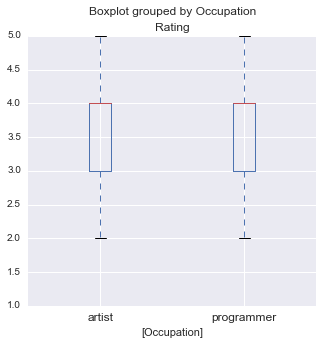

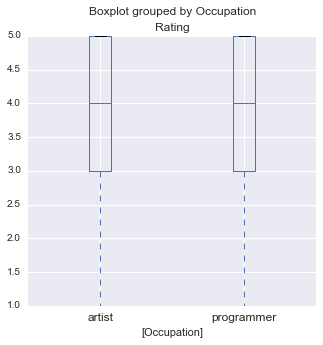

In [6]:
# First : create 2 boxplots, one for Each Genre grouped by Occupation
#
plot1 = OccupRating[OccupRating['Genre'] == 'Musical'].boxplot(by='Occupation', figsize=(5,5) )
plot2 = OccupRating[OccupRating['Genre'] == 'Sci-Fi'].boxplot(by='Occupation', figsize=(5,5) )

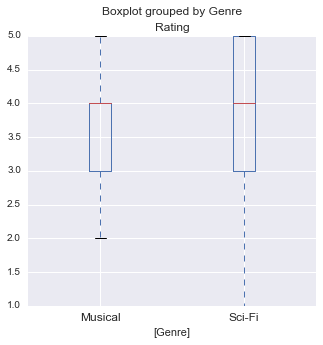

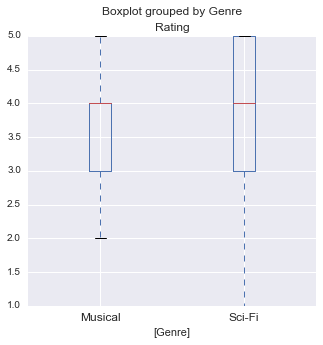

In [7]:
# 2nd  : create 2 boxplots, one for Each Occupation grouped by Genre
#
plot3 = OccupRating[OccupRating['Occupation'] == 'programmer'].boxplot(by='Genre', figsize=(5,5))
plot4 = OccupRating[OccupRating['Occupation'] == 'artist'].boxplot(by='Genre', figsize=(5,5))
 

#####   Plot a heat map of user occupation against genre, with the squares of the heatmap coloured corresponding to the average rating.

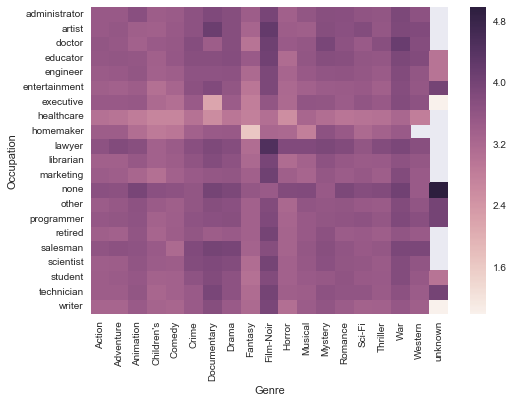

In [8]:
# Run the following SQL to get data from 3 tables, Fulldata, MovieGenre and u_genre
# Group by occupation and genre
#
# select 
#     full1.Occupation,
#     Genre.Genre, 
#     avg(full1.Rating) as avgrating
# from FullData full1 
#     join MovieGenre Mgenre 
#          on full1.Movie_id = Mgenre.Movie_id
#     join u_genre genre 
#          on Mgenre.Genre_id = genre.Genre_id 
#  group by full1.Occupation,Genre.Genre
#   
#  
query = 'select full1.Occupation, Genre.Genre, avg(Rating) as avgrating '\
'from FullData full1  join MovieGenre Mgenre '\
'on full1.Movie_id = Mgenre.Movie_id '\
'join u_genre genre on Mgenre.Genre_id = genre.Genre_id '\
' group by full1.Occupation,Genre.Genre  ' 

# Get all required data for plotting, also create table 
#
AllOccupRating = (sql.read_sql_query(query, cnx))

# Create the heat map (first, pivot the data)
#
Heat1 = AllOccupRating.pivot("Occupation", "Genre", "avgrating") 
Heatplot = sns.heatmap(Heat1)


##### Develop a logistic regression model to predict users’ gender based on the average rating they give each genre of movie.
##### Say which genre scores are most predictive of gender, based on the coefficients of the logistic regression model.
##### Report the accuracy of the logistic regression method.

In [9]:
# Run the following SQL to get data from table Fulldata 
#
# select 
#     Case full1.Gender when 'M' then 0 when 'F' then 1 end as Gender,
#     unknown, Action, 
#     Adventure, Animation, Childrens,
#     omedy, Crime, Documentary, Drama,
#     Fantasy, Film-Noir, Horror, Musical, 
#     Mystery, Romance, Sci-Fi, Thriller, War, 
#     Western,
#     full1.Rating  as Rating             
# from FullData full1 
#  

query = 'select Case full1.Gender when "M" then 0 when "F" then 1 end as Gender, '\
'unknown, Action, Adventure, Animation, Childrens,'\
'comedy, Crime, Documentary, Drama, Fantasy, FilmNoir, Horror, Musical,'\
'Mystery, Romance, SciFi, Thriller, War,Western '\
' , full1.Rating as Rating from FullData full1 '  
 

GenderGenreRating = (sql.read_sql_query(query, cnx))
 
GenderGenreRating.head(10)

,Gender,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Rating
0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,3
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,4
7,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,3


In [10]:
# Run the logistic regression  using the package statsmodels 
#  
#  Dependant column is Gender  (its set to 0 or 1)
#
##
#  Note  Male = 0 ,  Female = 1
##

train_cols = GenderGenreRating.columns[1:]

logit = sm.Logit(GenderGenreRating['Gender'], GenderGenreRating[train_cols])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.571605
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Gender   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99980
Method:                           MLE   Df Model:                           19
Date:                Mon, 12 Sep 2016   Pseudo R-squ.:               -0.002253
Time:                        10:47:32   Log-Likelihood:                -57160.
converged:                       True   LL-Null:                       -57032.
                                        LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Unknown        -0.9004      0.793     -1.135      0.256        -2.455     0.654
Action         -0.3883    

In [11]:
# print the confidence interval of each coeffecient 
print result.conf_int() 


                    0         1
Unknown     -2.455135  0.654391
Action      -0.430971 -0.345589
Adventure   -0.193434 -0.090719
Animation   -0.396666 -0.202948
Childrens    0.089570  0.228491
Comedy      -0.411640 -0.342163
Crime       -0.302770 -0.189360
Documentary -0.693623 -0.356488
Drama       -0.280381 -0.211413
Fantasy     -0.210218  0.047560
FilmNoir    -0.420699 -0.178976
Horror      -0.505553 -0.369431
Musical     -0.190247 -0.045132
Mystery     -0.155776 -0.019195
Romance      0.132246  0.204021
SciFi       -0.347384 -0.246879
Thriller    -0.304875 -0.224712
War         -0.212028 -0.105537
Western     -0.591990 -0.358064
Rating      -0.164484 -0.146270
